# LFP example: regression vs estimation of difference
## Make and visualize model oscillation power
40 trials of "theta power" is generated for every animal. It is drawn randomly as a poisson process.

This is repeated for "stimulation" trials, but poisson rate is higher.

In [15]:
import altair as alt
from bayes_window import BayesWindow, models, BayesRegression, LMERegression, BayesConditions
from bayes_window.generative_models import generate_fake_lfp

try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [16]:
# Draw some fake data:
df, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=15, n_trials=30)

## Estimate posteriors for treatments

In [17]:
# Initialize:
window = BayesWindow(df=df, y='Power', #condition='stim',
                     group='mouse', 
                     treatment='stim')
# Fit:
estimation = BayesConditions(window).fit(dist_y='gamma')


n(Divergences) = 4


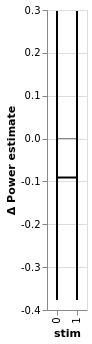

In [18]:
estimation.plot(color=':O')#.facet(column='mouse')

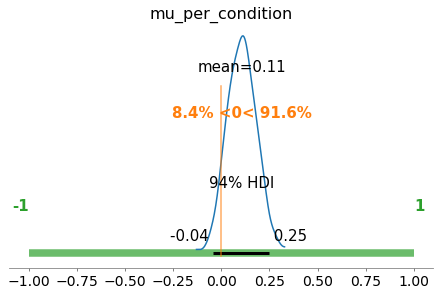

In [19]:
estimation.plot_BEST()

## Compare with regression approach

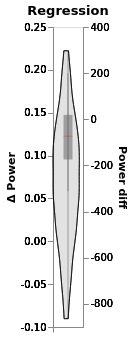

In [20]:
# Initialize:
# window = BayesWindow(df=df, y='Power', treatment='stim', group='mouse')
# Fit:
regression = BayesRegression(window).fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma')
(regression.chart + regression.chart_posterior_kde).properties(title='Regression')

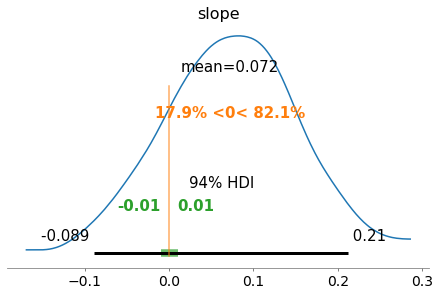

In [21]:
regression.plot_BEST()

## Evaluate sensitivity: CM

In [1]:

import numpy as np

from bayes_window import model_comparison, BayesWindow
from bayes_window.generative_models import generate_fake_lfp


### y=Power

In [22]:
# NBVAL_SKIP
# Note: Only works with single ys and single true_slopes
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(15),
                                                             np.tile(10, 15)]),
                                      n_trials=np.linspace(10, 70, 3).astype(int),
                                      ys=('Power',),
                                      methods=('bc_gamma','bw_gamma',),
                                      parallel=True)

100%|██████████| 450/450 [42:45<00:00,  5.70s/it]


In [14]:
# NBVAL_SKIP
model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res[res['y'] == 'Power'], ('method', 'y', 'randomness', 'n_trials')
                                           )).properties(width=140).facet(row='method', column='n_trials')

alt.FacetChart(...)

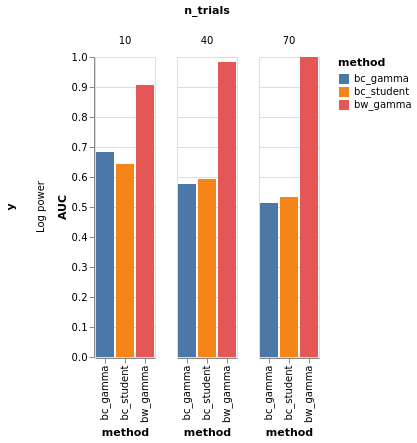

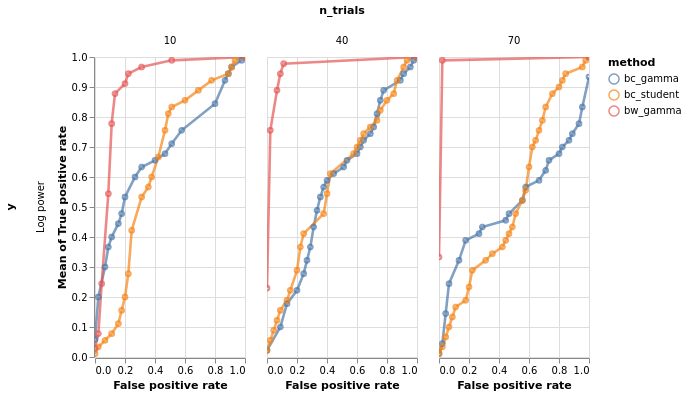

In [41]:
df = model_comparison.make_roc_auc(res, binary=False, groups=('method', 'y', 'n_trials'))

bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()
# NBVAL_SKIP

### y=Log power

In [35]:
# NBVAL_SKIP
# Note: Only works with single ys and single true_slopes
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(15),
                                                             np.tile(10, 15)]),
                                      n_trials=np.linspace(10, 70, 3).astype(int),
                                      ys=('Log power',),
                                      methods=('bc_normal','bc_gamma','bc_student','bw_gamma',),
                                      parallel=True)



  0%|          | 0/270 [00:00<?, ?it/s]

 16%|█▌        | 42/270 [00:23<00:34,  6.57it/s]

  5%|▌         | 14/270 [00:19<00:05, 45.14it/s]

 10%|█         | 28/270 [00:48<08:10,  2.03s/it]

 16%|█▌        | 42/270 [01:46<11:21,  2.99s/it]

 21%|██        | 56/270 [02:54<13:20,  3.74s/it]

 26%|██▌       | 70/270 [04:04<13:59,  4.20s/it]

 31%|███       | 84/270 [05:25<14:39,  4.73s/it]

 36%|███▋      | 98/270 [06:21<12:51,  4.49s/it]

 41%|████▏     | 112/270 [07:39<12:44,  4.84s/it]

 47%|████▋     | 126/270 [08:36<11:02,  4.60s/it]

 52%|█████▏    | 140/270 [10:07<11:14,  5.19s/it]

 57%|█████▋    | 154/270 [11:20<10:00,  5.18s/it]

 62%|██████▏   | 168/270 [12:23<08:28,  4.98s/it]

 67%|██████▋   | 182/270 [13:45<07:42,  5.25s/it]

 73%|███████▎  | 196/270 [14:48<06:12,  5.03s/it]

 78%|███████▊  | 210/270 [16:10<05:16,  5.28s/it]

 83%|████████▎ | 224/270 [17:09<03:47,  4.94s/it]

 88%|████████▊ | 238/270 [18:30<02:46,  5.21s/it]

 93%|█████████▎| 252/270 [19:32<01:29,  4.96s/i

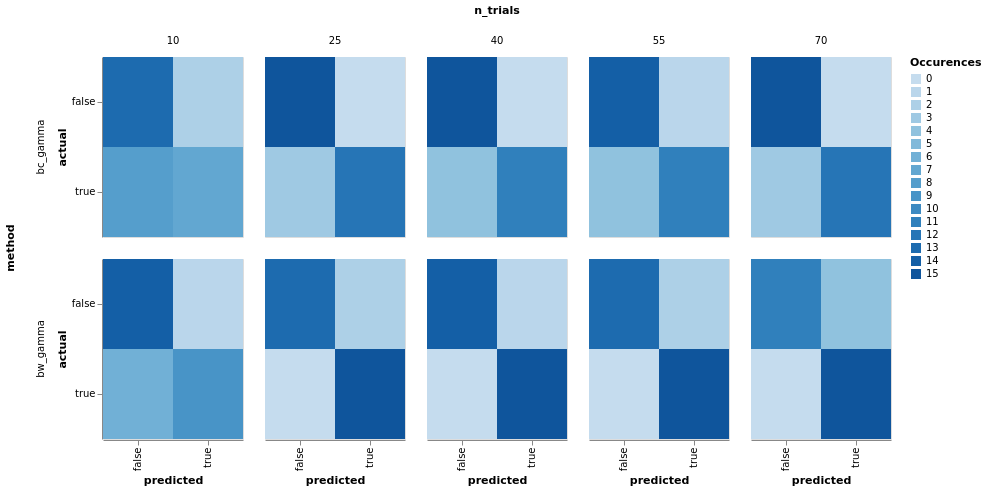

In [25]:
# NBVAL_SKIP
model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res[res['y'] == 'Log power'], ('method', 'y', 'randomness', 'n_trials')
                                           )).properties(width=140).facet(row='method', column='n_trials')

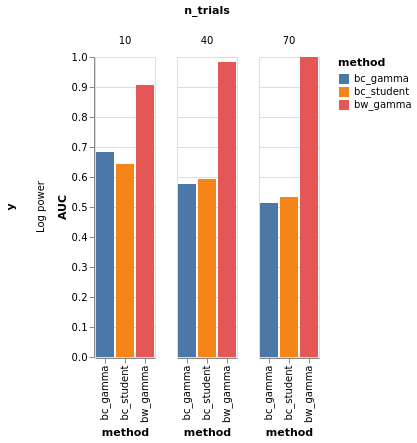

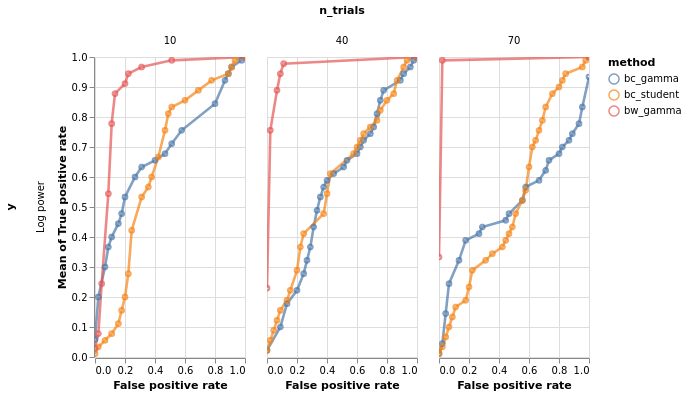

In [41]:
df = model_comparison.make_roc_auc(res, binary=False, groups=('method', 'y', 'n_trials'))

bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()
# NBVAL_SKIP